# EDA

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from ydata_profiling import ProfileReport

In [70]:
df = pd.read_csv("Customer Churn.csv")
df.head()

Call  Failure  Complains  Subscription  Length  Charge  Amount  \
0              8          0                    38               0   
1              0          0                    39               0   
2             10          0                    37               0   
3             10          0                    38               0   
4              3          0                    38               0   

   Seconds of Use  Frequency of use  Frequency of SMS  \
0            4370                71                 5   
1             318                 5                 7   
2            2453                60               359   
3            4198                66                 1   
4            2393                58                 2   

   Distinct Called Numbers  Age Group  Tariff Plan  Status  Age  \
0                       17          3            1       1   30   
1                        4          2            1       2   25   
2                       24          3            1       1   30   
3                       35          1            1       1   15   
4                       33          1            1       1   15   

   Customer Value  Churn  
0         197.640      0  
1          46.035      0  
2        1536.520      0  
3         240.020      0  
4         145.805      0

+ **Call Failures:** number of call failures
+ **Complains:** binary (0: No complaint, 1: complaint)
+ **Subscription Length:** total months of subscription
+ **Charge Amount:** Ordinal attribute (0: lowest amount, 9: highest amount)
+ **Seconds of Use:** total seconds of calls
+ **Frequency of use:** total number of calls
+ **Frequency of SMS:** total number of text messages
+ **Distinct Called Numbers:** total number of distinct phone calls 
+ **Age Group:** ordinal attribute (1: younger age, 5: older age)
+ **Tariff Plan:** binary (1: Pay as you go, 2: contractual)
+ **Status:** binary (1: active, 2: non-active)
+ **Customer Value:** The calculated value of customer
+ **Churn:** binary (1: churn, 0: non-churn) - Class label

In [71]:
## Function to rename properly the columns

def rename_features(feature_name: str) -> str:
    # Get rid of the leading and trailing whitespaces
    new_name = feature_name.strip()

    # Lower case only
    new_name = new_name.lower()

    # Replace the double spaces with only one
    new_name = new_name.replace("  ", " ")

    # Finally replace the spaces with underscores
    new_name = new_name.replace(" ", "_")

    return new_name


In [72]:
rename_dict = {}

features_list = df.columns.to_list()

for feature in features_list:
    rename_dict[feature] = rename_features(feature)
    
df = df.rename(columns=rename_dict)

In [80]:
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()
# profile.to_file("churn_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

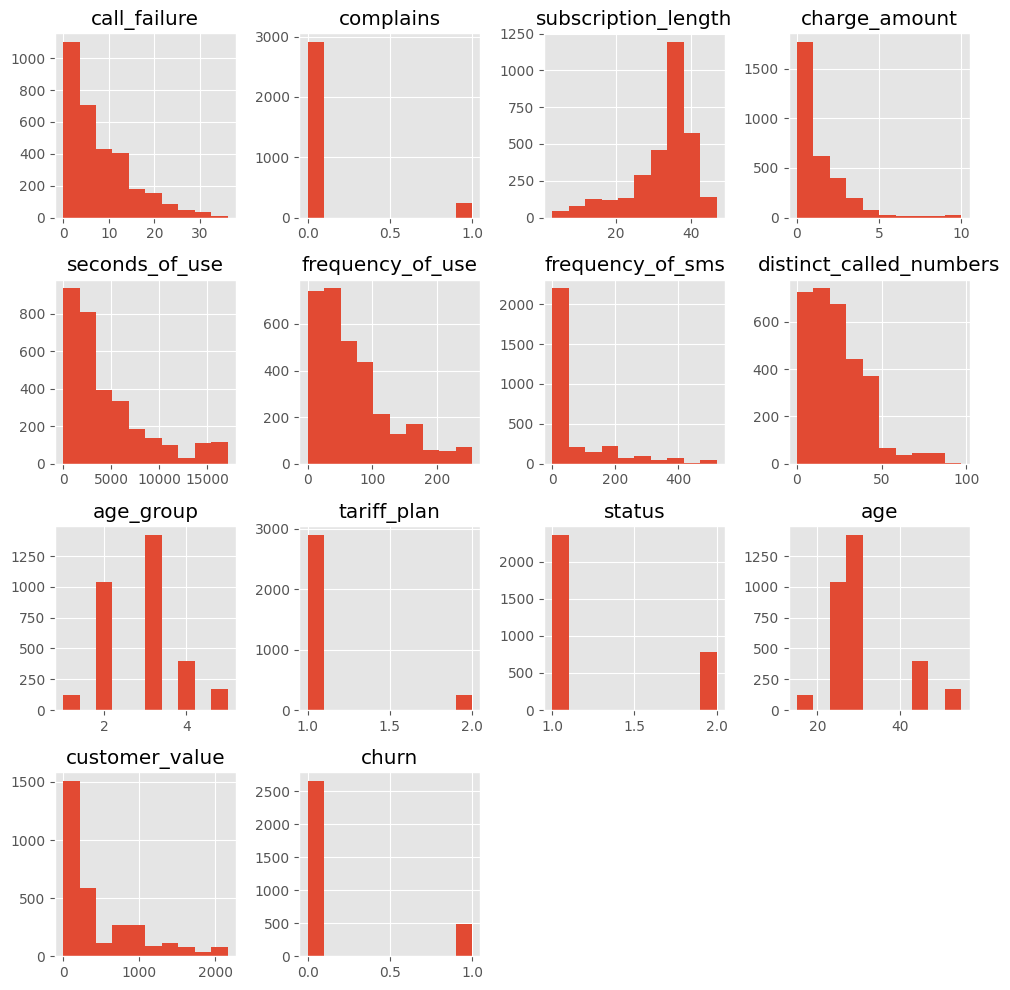

In [78]:
ax = df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

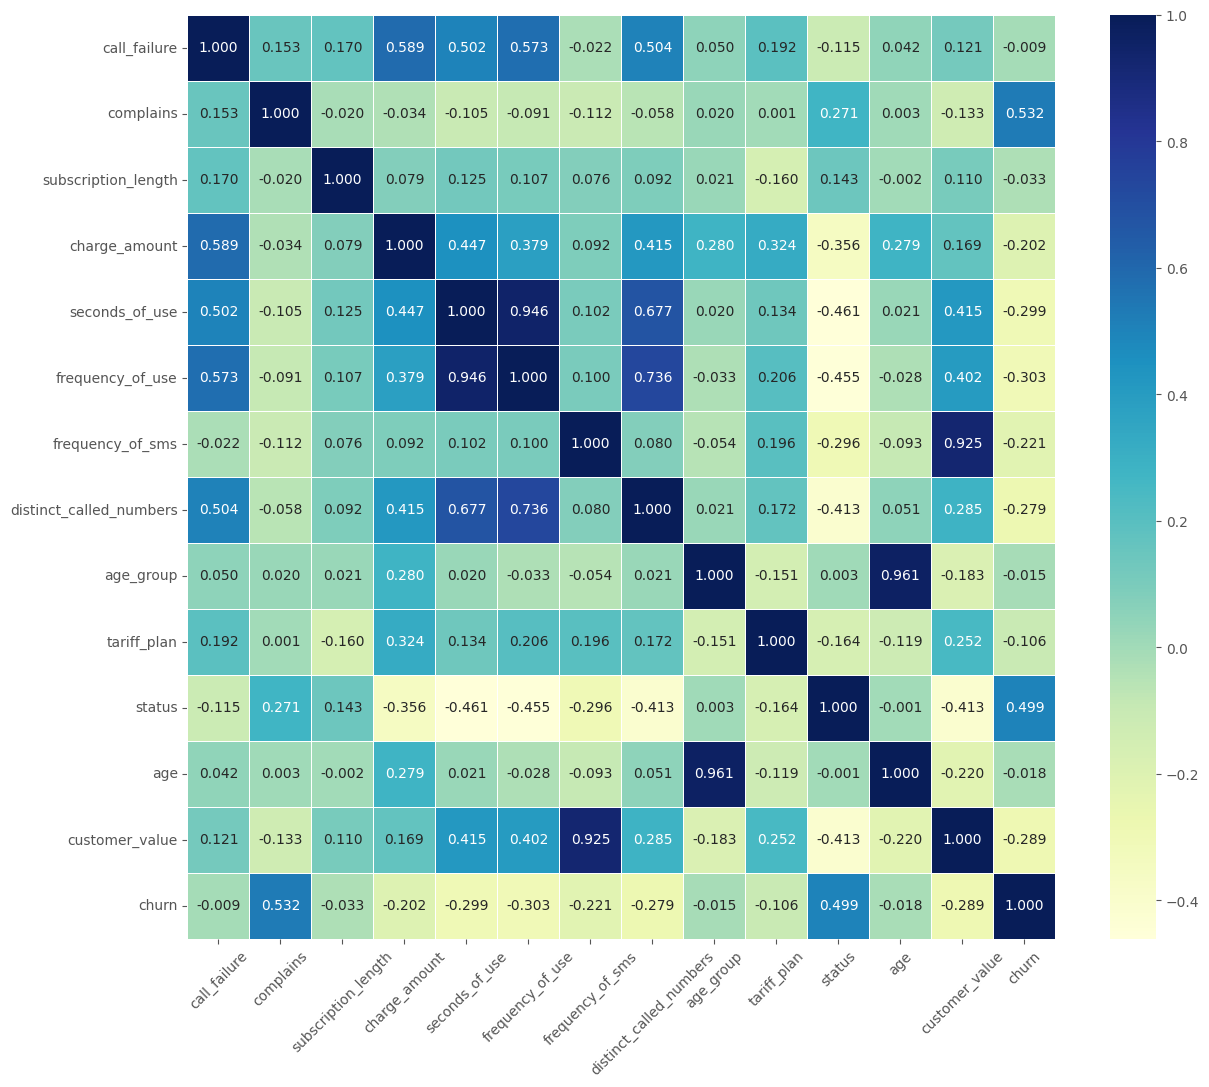

In [75]:
plt.figure(figsize=(14,12))

sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".3f", linewidths=.6)
plt.yticks(rotation=0)
plt.xticks(rotation=45)

plt.show()

# Model Development

In [76]:
from sklearn.model_selection import train_test_split

PEUT MIEUX FAIRE !!!!!! 

In [65]:
X = df.drop(columns=['churn'])
y = df['churn']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)